In [58]:
import warnings

warnings.filterwarnings(action='ignore')

import torch
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from forest_cover_change_detection.models.fc_ef import FCFE
from notebooks.daudt.net_trainer import get_img_trio

In [53]:
df = pd.read_csv('../../../data/annotated/test.csv')
results = pd.read_csv('./results.csv')
metrics = pd.read_csv('./metric_eval.csv')

<Figure size 2400x1200 with 0 Axes>

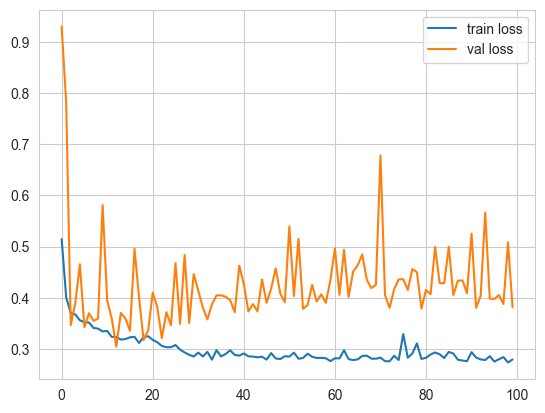

In [54]:
plt.figure(figsize=(12, 6), dpi=200)
results.loc[:, ['train loss', 'val loss']].plot()
plt.show()

In [55]:
metrics.describe().T

,count,mean,std,min,25%,50%,75%,max
overall accuracy,33.0,0.937147,0.058806,0.757401,0.902618,0.961380,0.974564,0.998230
change accuracy,33.0,0.445246,0.347776,0.000000,0.128019,0.437173,0.746324,0.991852
no change accuracy,33.0,0.948555,0.068579,0.708537,0.929223,0.976392,0.993629,0.999570
precision,33.0,0.384747,0.241031,0.000000,0.228106,0.365752,0.545443,0.864198
recall,33.0,0.415181,0.343405,0.000000,0.097629,0.327381,0.698901,0.983904
dice,30.0,0.370662,0.229443,0.010902,0.182194,0.344294,0.513923,0.780771
kappa,33.0,0.309456,0.233201,-0.003003,0.123633,0.325561,0.446398,0.759715


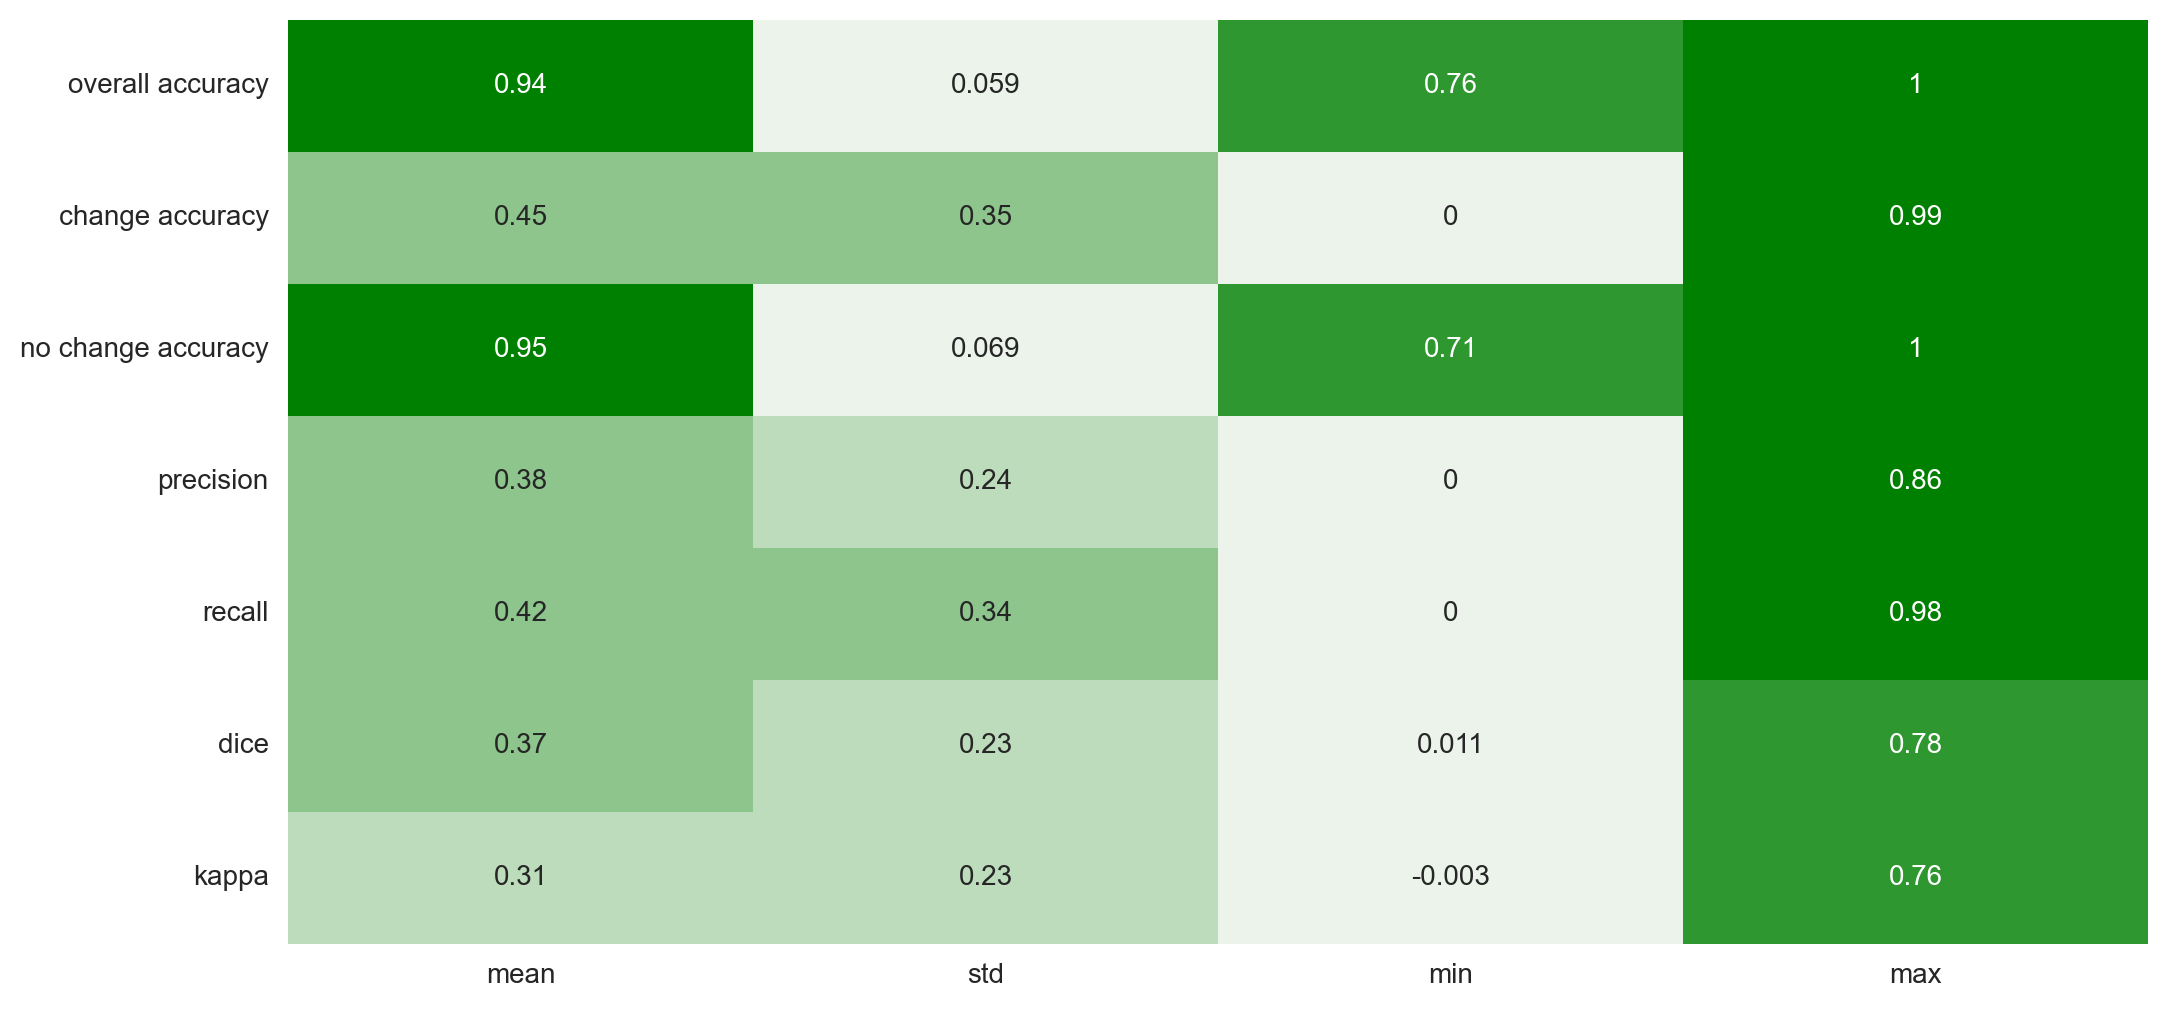

In [62]:
plt.figure(figsize=(12, 6), dpi=200)
sns.heatmap(metrics.describe().T[['mean', 'std', 'min', 'max']],
            annot=True,
            cbar=False,
            cmap=sns.light_palette('green'))
plt.show()

In [56]:
model = FCFE(6, 3, 2)
state = torch.load(f"./last-checkpoint.pth")
model.load_state_dict(state['model_state_dict'])
model = model.cuda()

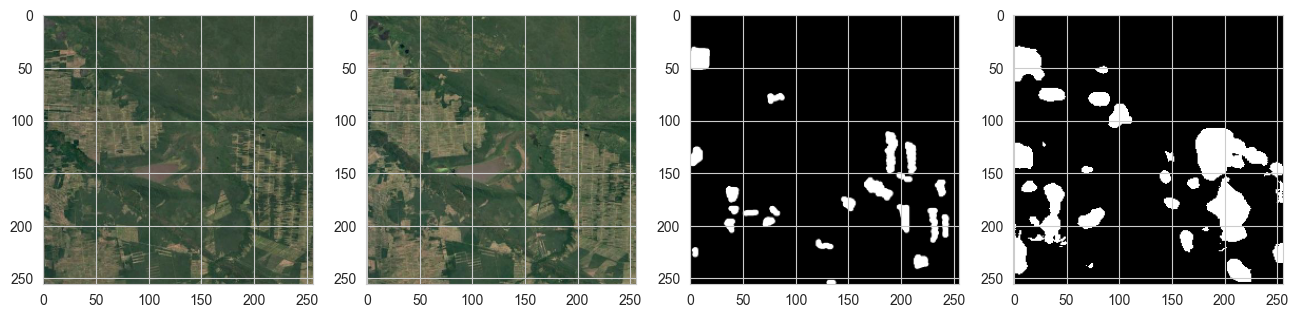

In [57]:
img_1, img_2, label, dir = df.sample(1).values.tolist()[0]
img1, img2, gt = get_img_trio(f'../../../data/annotated/{dir}/{img_1}',
                              f'../../../data/annotated/{dir}/{img_2}',
                              f'../../../data/annotated/{label}')

with torch.no_grad():
    model.eval()
    img = torch.cat((img1, img2))
    logits = model(img.unsqueeze(0).to('cuda'))[0].cpu()
    pred = torch.argmax(torch.sigmoid(logits), dim=0)

plt.figure(figsize=(16, 10))
plt.subplot(1, 4, 1)
plt.imshow(img1.permute(1, 2, 0), cmap='gray')
plt.subplot(1, 4, 3)
plt.imshow(gt, cmap='gray')
plt.subplot(1, 4, 2)
plt.imshow(img2.permute(1, 2, 0), cmap='gray')
plt.subplot(1, 4, 4)
plt.imshow(pred, cmap='gray')